<a href="https://colab.research.google.com/github/sameersami07/Basicmachinelearning/blob/main/EDA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a very basic tutorial for exploratory data analyis and data visualization using the '***swiggy Data Set***'

The swiggy data set is best known database to be found in the pattern recognition literature. Before moving to machine learning for pattern learning, we will perform EDA and visualize the data set.

The Swiggy dataset consists of 150 observations with 6 features related to restaurants and food delivery. These features include:

**Price** - The average cost for two people in the restaurant.

**Avg Rating**s - The average user rating for the restaurant, indicating customer satisfaction.

**Total Ratings** - The total number of user ratings received by the restaurant, reflecting popularity.

**Delivery Time** - The time taken (in minutes) to deliver food from the restaurant.

**City** - The city where the restaurant operates.

**Area** - The specific locality or neighborhood of the restaurant.

The dataset categorizes restaurants based on cuisines or food types such as Indian, Chinese, Italian, and Fast Food, offering insights into customer preferences and operational performance.

We'll use two libraries for this tutorial: pandas, numpy, matplotlib, and seaborn.


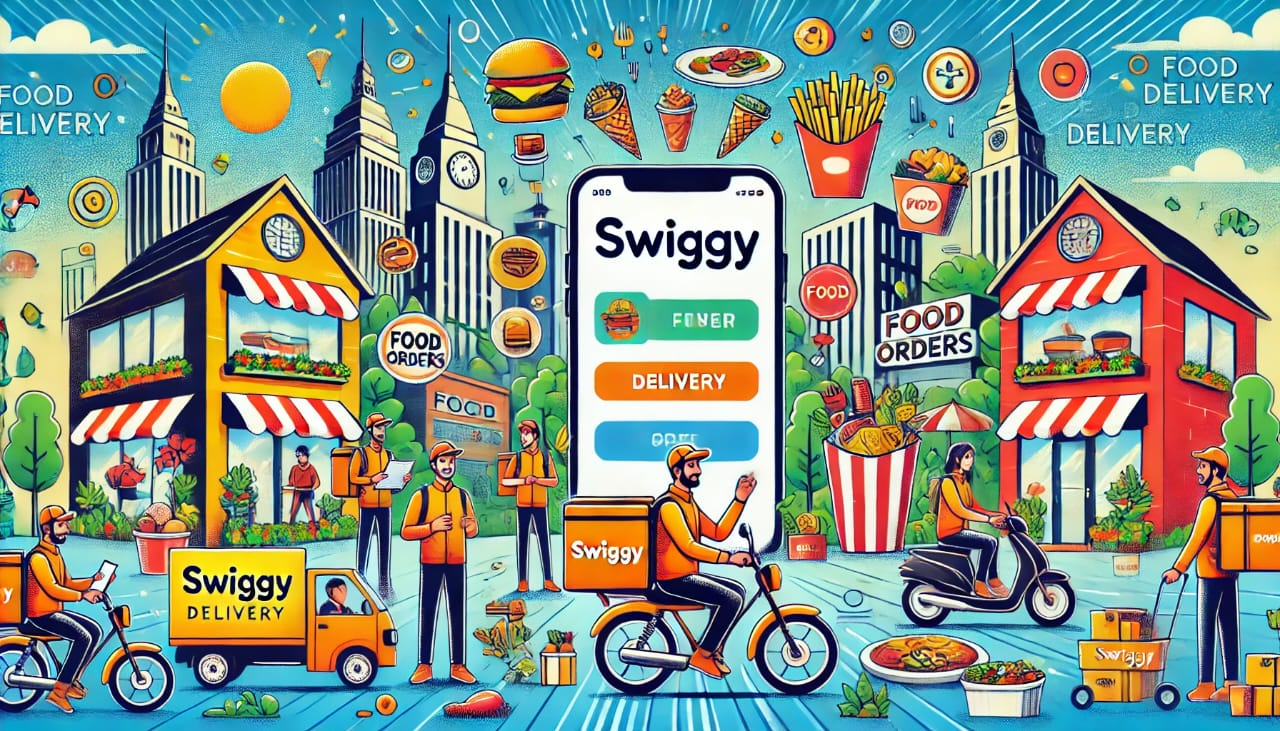

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
swiggy = pd.read_csv('/content/swiggy (1).csv')
swiggy.shape

(8680, 10)

In [5]:
swiggy.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [7]:
swiggy.Restaurant.unique()

array(['Tandoor Hut', 'Tunday Kababi', 'Kim Lee', ...,
       'Chinese Kitchen King', 'Shree Ram Paratha Wala', 'Sassy Street'],
      dtype=object)

In [9]:
# Let's check if there in any inconsitency in the data set
swiggy = swiggy.drop('ID', axis=1)
swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           8680 non-null   object 
 1   City           8680 non-null   object 
 2   Restaurant     8680 non-null   object 
 3   Price          8680 non-null   float64
 4   Avg ratings    8680 non-null   float64
 5   Total ratings  8680 non-null   int64  
 6   Food type      8680 non-null   object 
 7   Address        8680 non-null   object 
 8   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 610.4+ KB


In [11]:
# Let's see how many examples we have of each species
swiggy["Restaurant"].value_counts()

,count
Restaurant,
La Pino'Z Pizza,13
Nic Natural Ice Creams,10
Baskin Robbins,10
Subway,10
Kfc,9
...,...
Home Factory,1
Meals And Bowls,1
Waffle Dreams,1


#Visual Exploratory Data Analysis

Scatter Plots

Scatter plots use a collection of points placed using Cartesian coordinates to display values from two variables.

By displaying a variable in each axis, we can detect if a relationship or correlation between the two variables exists. Scatter Plots are also great for observing the spread of the data as they retain the exact data values and sample size.

#1. Scatter Plot - Price vs Ratings
Purpose: Analyze whether higher prices lead to better ratings.




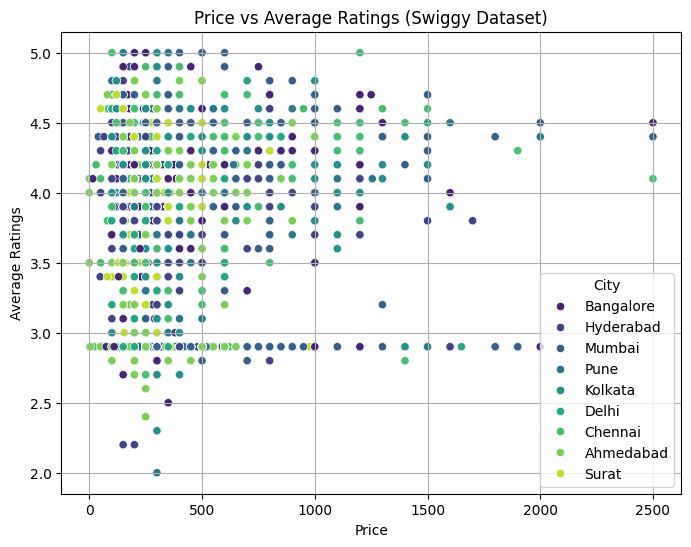

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Price vs Average Ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Price', y='Avg ratings', hue='City', palette='viridis')
plt.title('Price vs Average Ratings (Swiggy Dataset)')
plt.xlabel('Price')
plt.ylabel('Average Ratings')
plt.grid(True)
plt.show()


#Plot Insights:

*Helps detect trends, clusters, or outliers in price vs rating relationships.

*Points are color-coded by City to show regional variations.


#2. Scatter Plot - Delivery Time vs Total Ratings
Purpose: Explore if highly-rated restaurants have faster delivery times.


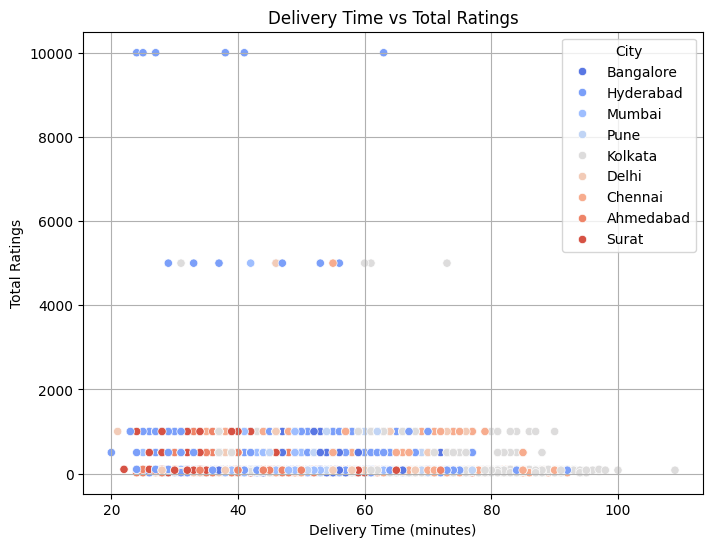

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Delivery time', y='Total ratings', hue='City', palette='coolwarm')
plt.title('Delivery Time vs Total Ratings')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Total Ratings')
plt.grid(True)
plt.show()


#Plot Insights:

*Identify whether popular restaurants deliver faster.

*Highlight patterns or clusters in delivery performance based on ratings.

In [14]:
import plotly.express as px

fig = px.scatter(data, x='Price', y='Avg ratings', color='City',
                 size='Total ratings', hover_data=['Area'],
                 title="Interactive Scatter Plot: Price vs Ratings")
fig.show()


#Jointplot - Price vs Avg Ratings

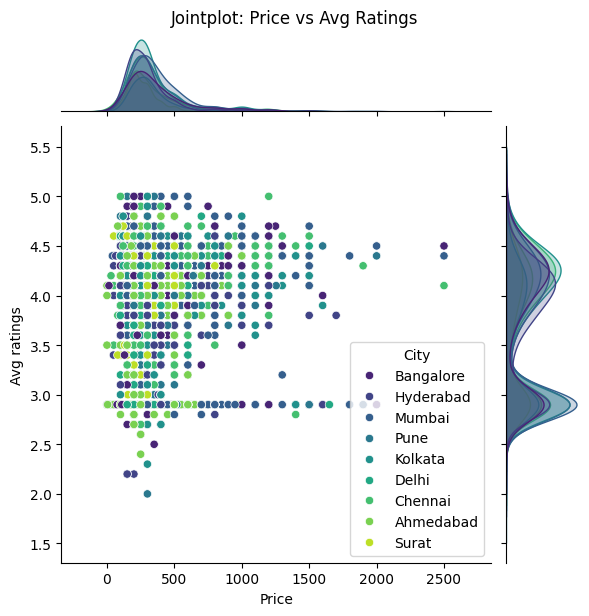

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Jointplot for Price vs Avg Ratings
sns.jointplot(data=data, x='Price', y='Avg ratings', kind='scatter', hue='City', palette='viridis')

# Show the plot
plt.suptitle('Jointplot: Price vs Avg Ratings', y=1.02)
plt.show()


#Strip Plot - Price vs City

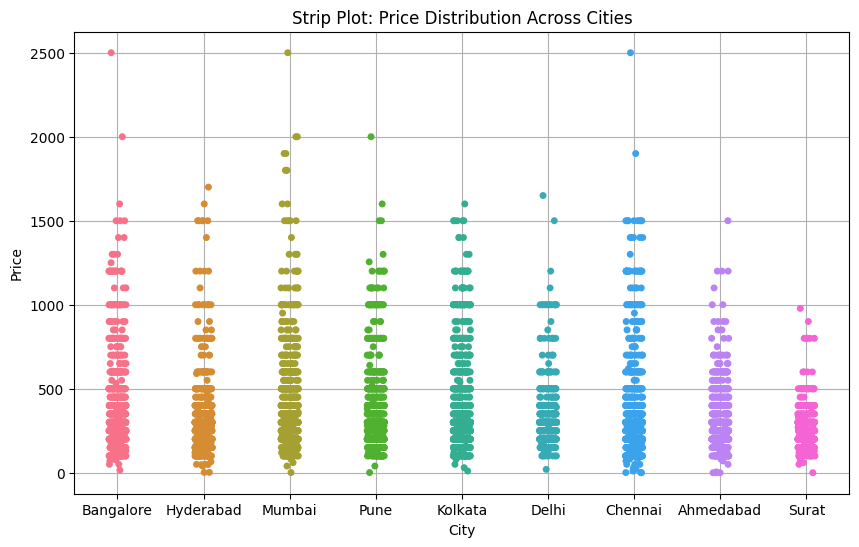

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip plot for Price vs City
plt.figure(figsize=(10, 6))
sns.stripplot(data=data, x='City', y='Price', jitter=True, palette='husl')

# Add titles and labels
plt.title('Strip Plot: Price Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Price')
plt.grid(True)
plt.show()


#Boxplot - Price vs City


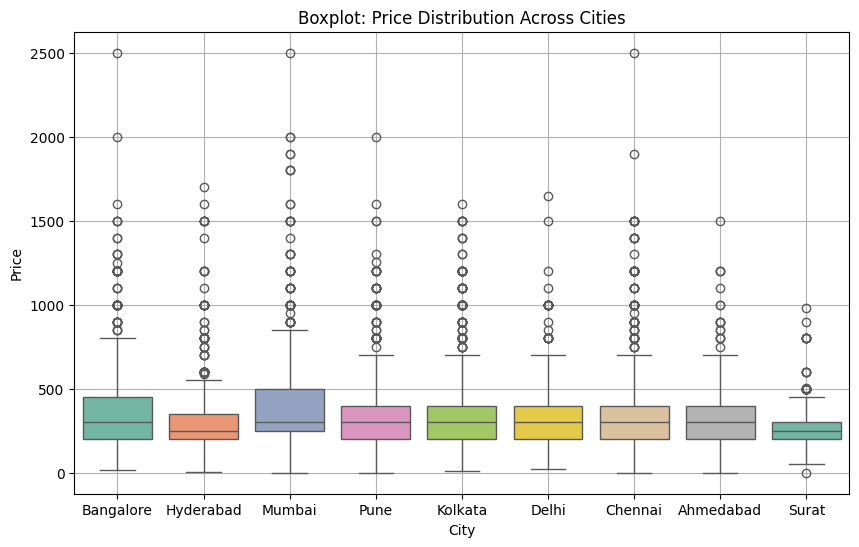

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Price Distribution across Cities
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='City', y='Price', palette='Set2')

# Add titles and labels
plt.title('Boxplot: Price Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Price')
plt.grid(True)
plt.show()


#Violin Plot

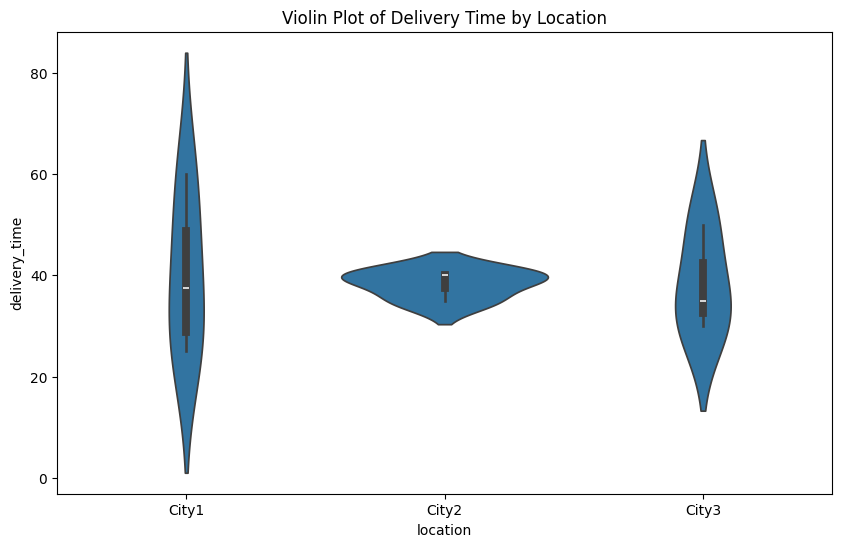

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (this should be replaced with your actual Swiggy dataset)
data = {
    'order_value': [200, 350, 450, 300, 550, 400, 250, 600, 500, 700],
    'delivery_time': [30, 40, 25, 35, 50, 45, 30, 40, 60, 35],
    'rating': [4.5, 4.0, 4.2, 3.8, 4.8, 4.0, 4.1, 4.7, 4.3, 3.9],
    'location': ['City1', 'City2', 'City1', 'City2', 'City3', 'City1', 'City3', 'City2', 'City1', 'City3']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create a violin plot for 'delivery_time' by 'location'
plt.figure(figsize=(10, 6))
sns.violinplot(x='location', y='delivery_time', data=df)
plt.title('Violin Plot of Delivery Time by Location')
plt.show()


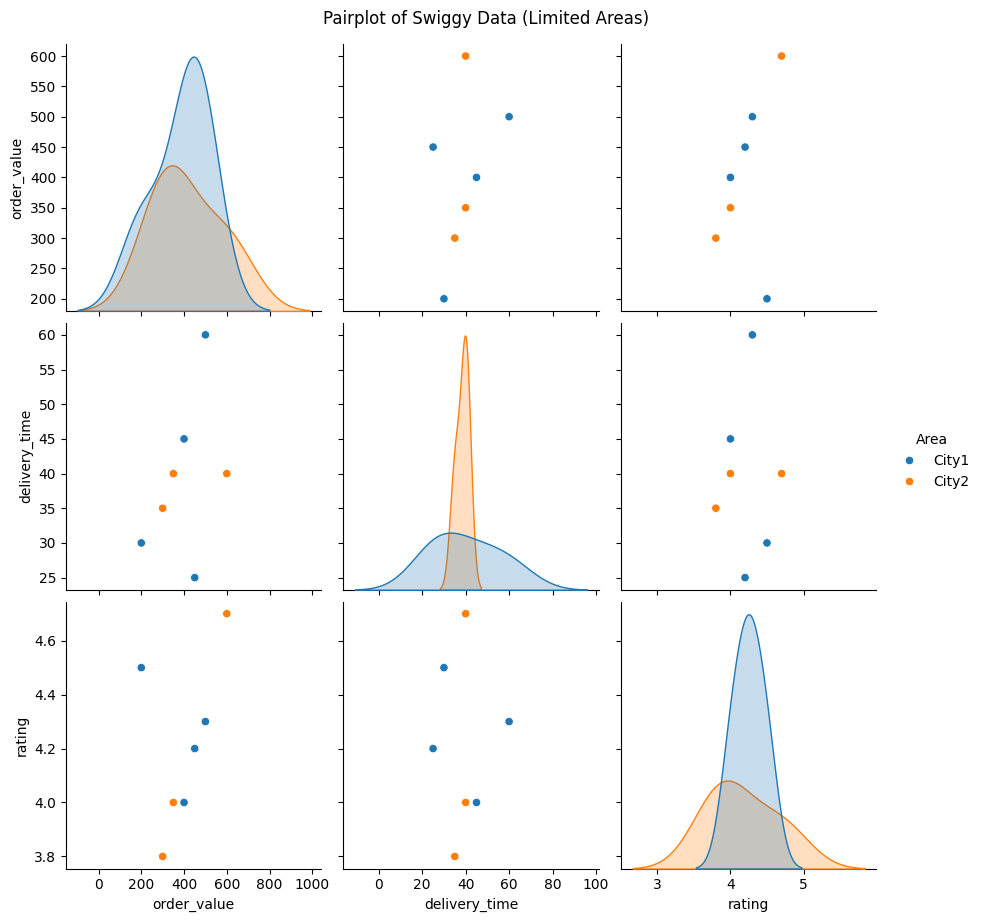

In [21]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation between each pair of features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset (replace with your Swiggy dataset)
data = {
    'order_value': [200, 350, 450, 300, 550, 400, 250, 600, 500, 700],
    'delivery_time': [30, 40, 25, 35, 50, 45, 30, 40, 60, 35],
    'rating': [4.5, 4.0, 4.2, 3.8, 4.8, 4.0, 4.1, 4.7, 4.3, 3.9],
    'Area': ['City1', 'City2', 'City1', 'City2', 'City3', 'City1', 'City3', 'City2', 'City1', 'City3']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter the data to include only selected areas (e.g., 'City1' and 'City2')
filtered_df = df[df['Area'].isin(['City1', 'City2'])]

# Create pairplot for the filtered data
sns.pairplot(data=filtered_df, hue="Area", height=3)
plt.suptitle('Pairplot of Swiggy Data (Limited Areas)', y=1.02)  # Adjust title position
plt.show()




**Heat Map:** is used to find out the correlation between different features in the dataset. High positive or negative value shows that the features have high correlation.This helps us to select the parmeters for machine learning.



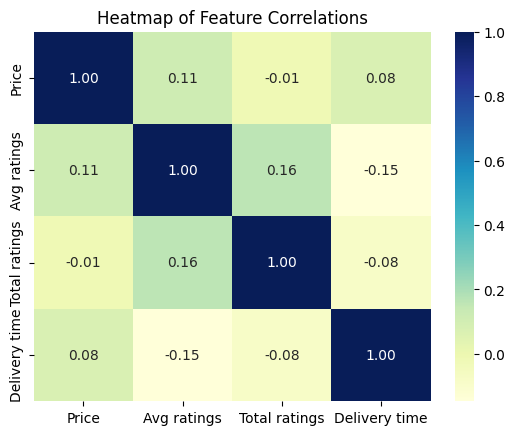

In [29]:
# Plotting heat map
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
swiggy = pd.read_csv('/content/swiggy (1).csv')  # Replace with the correct path to your dataset

# Plotting the heatmap
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()






#Statistical Exploratory Data Analysis

In [30]:
swiggy.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [34]:
swiggy['Restaurant'].unique()

array(['Tandoor Hut', 'Tunday Kababi', 'Kim Lee', ...,
       'Chinese Kitchen King', 'Shree Ram Paratha Wala', 'Sassy Street'],
      dtype=object)

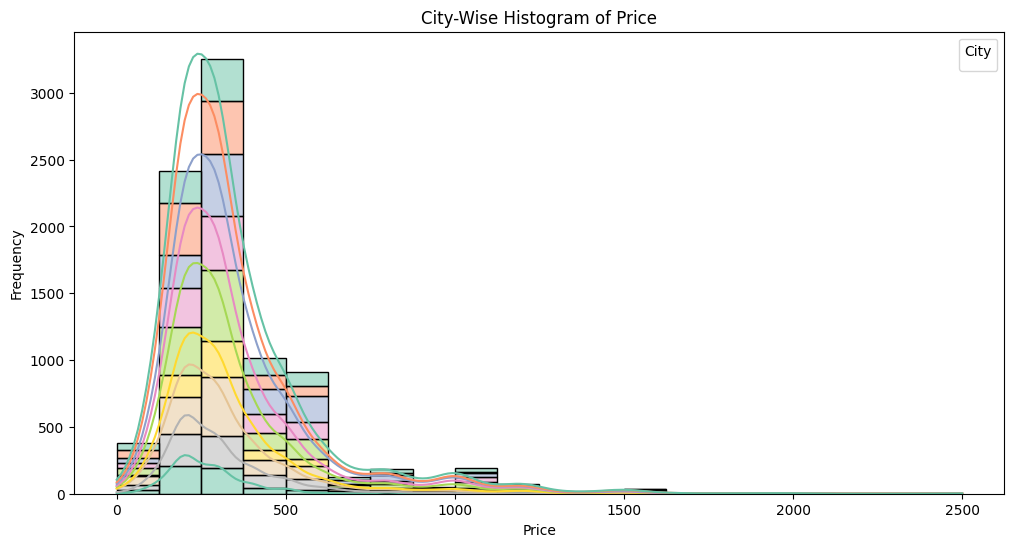

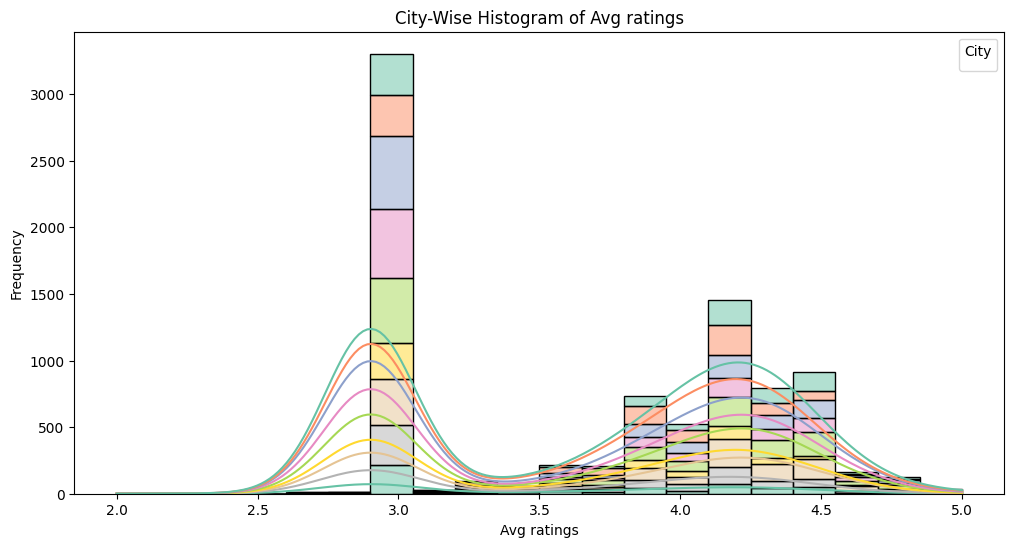

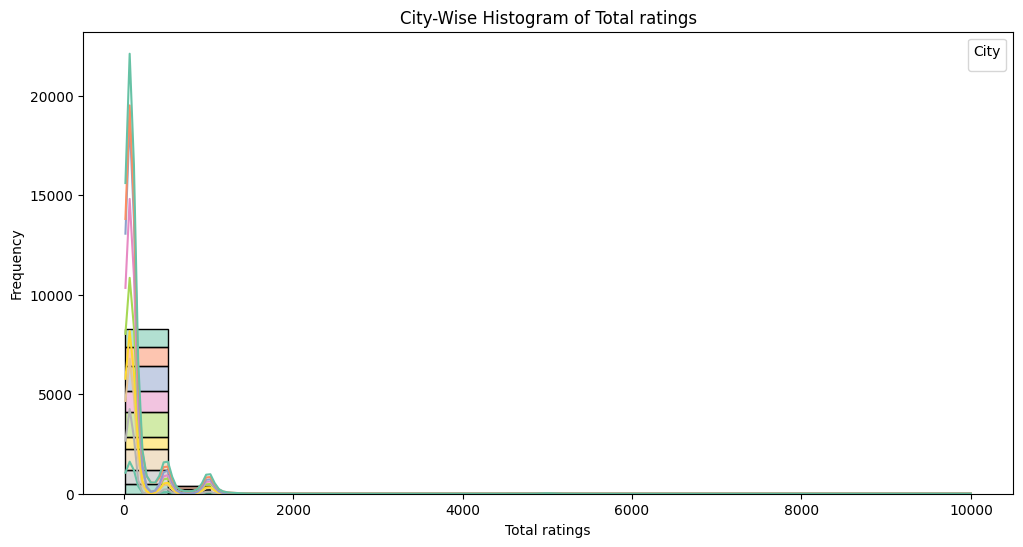

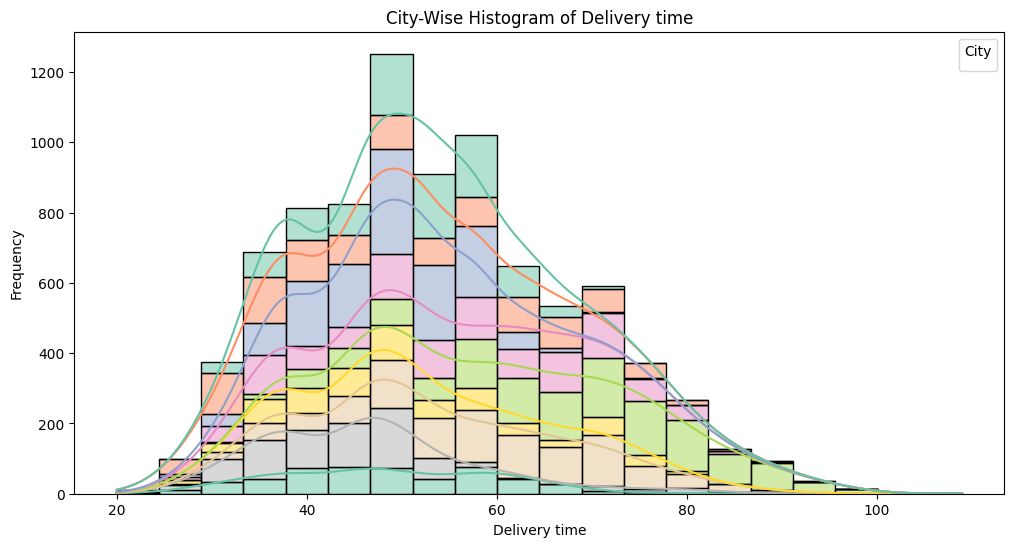

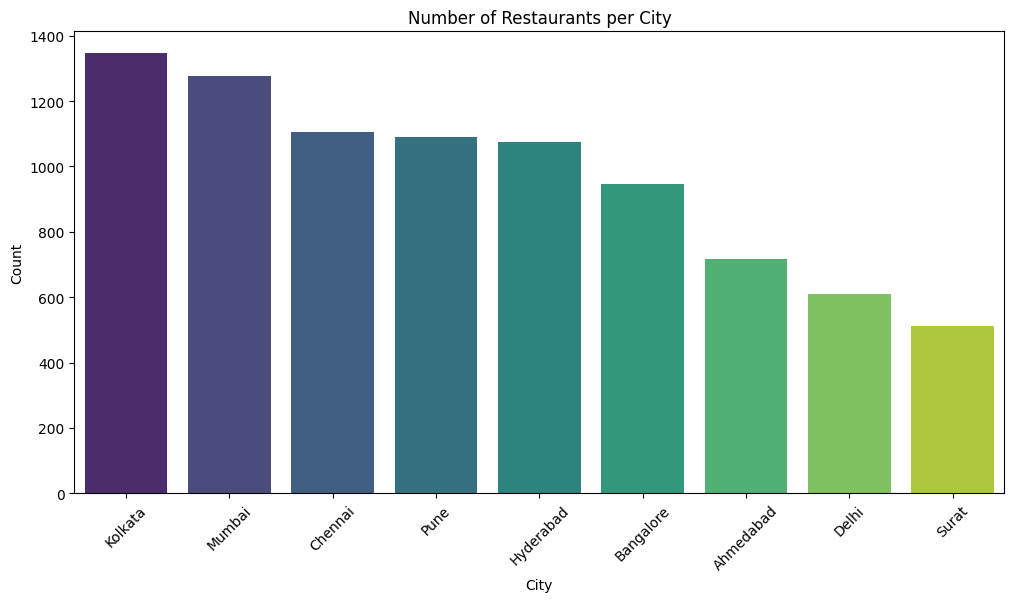

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
swiggy = pd.read_csv('/content/swiggy (1).csv')  # Replace with your file path

# Drop the 'Restaurant' column as it's redundant for city-wise analysis
swiggy = swiggy.drop(columns=['Restaurant'])

# Visual EDA - City-wise histograms for numerical features
numerical_features = ['Price', 'Avg ratings', 'Total ratings', 'Delivery time']

# Loop through numerical features and create histograms grouped by city
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=swiggy, x=feature, hue='City', multiple='stack', kde=True, palette='Set2', bins=20)
    plt.title(f'City-Wise Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='City')
    plt.show()

# Visualize the count of restaurants per city
plt.figure(figsize=(12, 6))
sns.countplot(data=swiggy, x='City', palette='viridis', order=swiggy['City'].value_counts().index)
plt.title('Number of Restaurants per City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#conclusion:
*Cities with higher average prices may reflect premium dining preferences, while cities with more restaurants offer greater variety.

*Longer delivery times in specific cities could indicate operational challenges or traffic issues.

*High ratings and total ratings often correlate with popular, well-established restaurants.

*Delivery time and price trends highlight potential areas for improving service efficiency or customer satisfaction.